In [ ]:
#notebook for labeling human data that wasn't pre-annotated

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import rc_context
from tqdm import tqdm
#from scipy.optimize import curve_fit
import scvi
import pickle
from adjustText import adjust_text
import matplotlib.patches as patches
import os

Global seed set to 0


In [ ]:
#file locations
#/home/ubuntu/s3_mount/Data/HUMAN_CELLS_MS0203.h5ad
#/home/ubuntu/s3_mount/Data/human_hippo/human_hippo_sparse.h5ad
#/home/ubuntu/s3_mount/Data/tabula_sapiens

#human_cell_landscape

In [2]:
#ts = sc.read_h5ad('/home/ubuntu/volatile/ts/TabulaSapiens.h5ad')

In [2]:
panglo = pd.read_csv('../data/annotations/PanglaoDB_markers_27_Mar_2020.tsv', delimiter = '\t')
panglo.head(2)

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,Mm Hs,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,Mm Hs,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826


In [2]:
hdata = sc.read_h5ad('/home/ubuntu/s3_mount/Data/HUMAN_CELLS_MS0203.h5ad')

ts_datasets = os.listdir('/home/ubuntu/s3_mount/Data/tabula_sapiens')

ts_datasets

['.ipynb_checkpoints',
 'TS_Bladder.h5ad',
 'TS_Blood.h5ad',
 'TS_Bone_Marrow.h5ad',
 'TS_Eye.h5ad',
 'TS_Fat.h5ad',
 'TS_Heart.h5ad',
 'TS_Kidney.h5ad',
 'TS_Large_Intestine.h5ad',
 'TS_Liver.h5ad',
 'TS_Lung.h5ad',
 'TS_Lymph_Node.h5ad',
 'TS_Mammary.h5ad',
 'TS_Muscle.h5ad',
 'TS_Pancreas.h5ad',
 'TS_Prostate.h5ad',
 'TS_Salivary_Gland.h5ad',
 'TS_Skin.h5ad',
 'TS_Small_Intestine.h5ad',
 'TS_Spleen.h5ad',
 'TS_Thymus.h5ad',
 'TS_Tongue.h5ad',
 'TS_Trachea.h5ad',
 'TS_Uterus.h5ad',
 'TS_Vasculature.h5ad',
 'TS_endothelial.h5ad',
 'TS_epithelial.h5ad',
 'TS_germ_line.h5ad',
 'TS_harmonized.h5ad',
 'TS_immune.h5ad',
 'TS_stromal.h5ad',
 'TabulaSapiens.h5ad',
 'Untitled.ipynb',
 'tabula_sapiens_metadata.csv']

In [8]:
ts_datasets

['.ipynb_checkpoints',
 'TS_Bladder.h5ad',
 'TS_Blood.h5ad',
 'TS_Bone_Marrow.h5ad',
 'TS_Eye.h5ad',
 'TS_Fat.h5ad',
 'TS_Heart.h5ad',
 'TS_Kidney.h5ad',
 'TS_Large_Intestine.h5ad',
 'TS_Liver.h5ad',
 'TS_Lung.h5ad',
 'TS_Lymph_Node.h5ad',
 'TS_Mammary.h5ad',
 'TS_Muscle.h5ad',
 'TS_Pancreas.h5ad',
 'TS_Prostate.h5ad',
 'TS_Salivary_Gland.h5ad',
 'TS_Skin.h5ad',
 'TS_Small_Intestine.h5ad',
 'TS_Spleen.h5ad',
 'TS_Thymus.h5ad',
 'TS_Tongue.h5ad',
 'TS_Trachea.h5ad',
 'TS_Uterus.h5ad',
 'TS_Vasculature.h5ad',
 'TS_endothelial.h5ad',
 'TS_epithelial.h5ad',
 'TS_germ_line.h5ad',
 'TS_immune.h5ad',
 'TS_stromal.h5ad',
 'TabulaSapiens.h5ad',
 'Untitled.ipynb',
 'tabula_sapiens_metadata.csv']

In [9]:
hdata.obs

,tissue,cell_type,age,sex,donor,sample,disease,tech,study,ref
AAACCTGAGCAGCCTC-1_L1,liver,not typed,44.0,M,liver_1,SRR7276474,healthy,10x,liver,10.1038/s41467-018-06318-7
AAACCTGCAGTAAGCG-1_L1,liver,not typed,44.0,M,liver_1,SRR7276474,healthy,10x,liver,10.1038/s41467-018-06318-7
AAACCTGCATGTCTCC-1_L1,liver,not typed,44.0,M,liver_1,SRR7276474,healthy,10x,liver,10.1038/s41467-018-06318-7
AAACCTGGTCCGTTAA-1_L1,liver,not typed,44.0,M,liver_1,SRR7276474,healthy,10x,liver,10.1038/s41467-018-06318-7
AAACCTGGTTCTGTTT-1_L1,liver,not typed,44.0,M,liver_1,SRR7276474,healthy,10x,liver,10.1038/s41467-018-06318-7
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCATACGGT-1-HCAHeart8102862,heart,Endothelial,62.5,F,D11,HCAHeart8102862,healthy,10x,heart,10.1038/s41586-020-2797-4
TTTGTTGTCCTACCAC-1-HCAHeart8102862,heart,Endothelial,62.5,F,D11,HCAHeart8102862,healthy,10x,heart,10.1038/s41586-020-2797-4
TTTGTTGTCGACGCTG-1-HCAHeart8102862,heart,Endothelial,62.5,F,D11,HCAHeart8102862,healthy,10x,heart,10.1038/s41586-020-2797-4
TTTGTTGTCGGCTGAC-1-HCAHeart8102862,heart,Endothelial,62.5,F,D11,HCAHeart8102862,healthy,10x,heart,10.1038/s41586-020-2797-4


In [15]:
#studies that need annotations: liver, skin, hcl, lung, hippo
#only heart and TS have annotations
#tansfer annotations from TS

In [3]:
def predict_annotations(adata, refdata):
    bak = adata.copy()
    
    refdata = refdata.raw.to_adata()
    refdata.obs['Batch'] = 'ref'
    adata.obs = adata.obs.rename(columns = {'cell_type':'cell_ontology_class', 'tech':'method'})
    adata.obs.method = adata.obs.method.replace('10x','10X')
    adata.obs['Batch'] = 'query'
    adata = sc.concat((adata, refdata))
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata

    sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000,
                                layer = "counts", subset = True)

    scvi.model.SCVI.setup_anndata(adata, layer = 'counts', batch_key= 'Batch',
                                  categorical_covariate_keys=['donor', 'method'])
    vae = scvi.model.SCVI(adata)
    vae.train()
    
    lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = adata, unlabeled_category = 'not typed',
                                        labels_key = 'cell_ontology_class')

    lvae.train()
    
    adata.obs['predicted'] = lvae.predict(adata)
    
    adata.obs['probabilities'] = lvae.predict(adata, soft = True).max(axis = 1)
    
    
    mapper = dict(zip(adata.obs.index, adata.obs.predicted))
    mapper2 = dict(zip(adata.obs.index, adata.obs.probabilities))
    
    bak.obs['cell_type'] = bak.obs.index.map(mapper)
    bak.obs['type_prob'] = bak.obs.index.map(mapper2)
    
    return bak


    
def pp(adata):
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
    adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]
    adata = adata[adata.obs.pct_counts_mt < 20]
    sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI
    sc.pp.log1p(adata) #change to log counts
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
    adata.raw = adata #save raw data before processing values and further filtering
    adata = adata[:, adata.var.highly_variable] #filter highly variable
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) #Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed
    sc.pp.scale(adata, max_value=10) #scale each gene to unit variance
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
    sc.tl.leiden(adata)
    sc.tl.umap(adata)
#    sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
#     results = adata.uns['rank_genes_groups']
#     out = np.array([[0,0,0,0,0]])
#     for group in results['names'].dtype.names:
#         out = np.vstack((out, np.vstack((results['names'][group],
#                                          results['scores'][group],
#                                          results['pvals_adj'][group],
#                                          results['logfoldchanges'][group],
#                                          np.array([group] * len(results['names'][group])).astype('object'))).T))
        
    
    return adata


def label_clean(adata, thresh = 0.85):
    test_labeler = {}
    mean_probs = adata.obs.groupby('leiden').mean()
    the_counts = adata.obs.groupby(['leiden', 'cell_type']).count().reset_index()

    for cluster in mean_probs.index:
        if mean_probs.loc[cluster].type_prob < thresh:
            test_labeler[cluster] = 'poor_match'
        else:
            temp = the_counts[the_counts.leiden == cluster]
            test_labeler[cluster] = temp.sort_values('tissue', ascending = False).iloc[0].cell_type

    adata.obs['clean_labels'] = adata.obs.leiden.map(test_labeler)
    
    return adata
    

# Liver

In [4]:
liver = predict_annotations(hdata[hdata.obs.tissue == 'liver'], 
                    sc.read_h5ad('/home/ubuntu/s3_mount/Data/tabula_sapiens/TS_Liver.h5ad'))

/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 172/172: 100%|███████| 172/172 [09:06<00:00,  3.18s/it, loss=281, v_num=1]
INFO     Training for 10 epochs.                                                             


/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 10/10: 100%|███████████| 10/10 [01:03<00:00,  6.39s/it, loss=355, v_num=1]


In [5]:
liver

AnnData object with n_obs × n_vars = 41577 × 21812
    obs: 'tissue', 'cell_type', 'age', 'sex', 'donor', 'sample', 'disease', 'tech', 'study', 'ref', 'type_prob'

In [8]:
liver = pp(liver)

/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [9]:
liver = label_clean(liver)

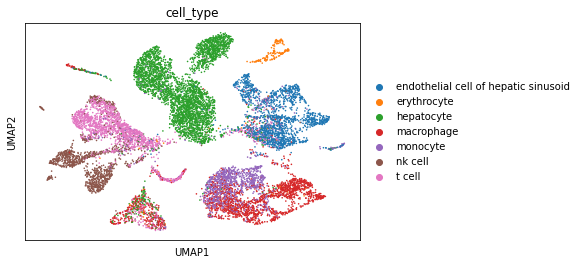

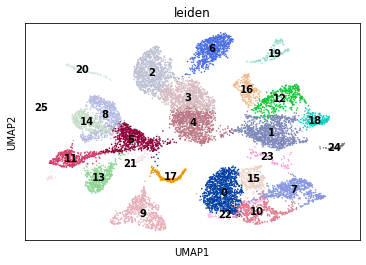

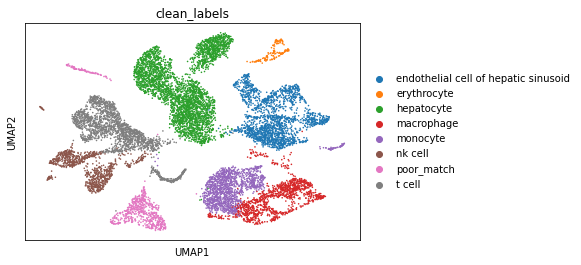

In [485]:
sc.pl.umap(liver, color = ['cell_type'])
sc.pl.umap(liver, color = ['leiden'], legend_loc='on data')
sc.pl.umap(liver, color = ['clean_labels'])

In [484]:
liver.obs[liver.obs.clean_labels == 'poor_match'].leiden.unique().tolist()

['9', '20']

In [488]:
###################
manual_labels = {
    '9': 'b cell',
    '20': 'unknown'
}


def a_thing(x):
    leiden, clean_label = x
    if clean_label != 'poor_match':
        return clean_label
    else:
        return manual_labels[leiden]

liver.obs['fin'] = liver.obs[['leiden', 'clean_labels']].apply(a_thing, axis = 1)

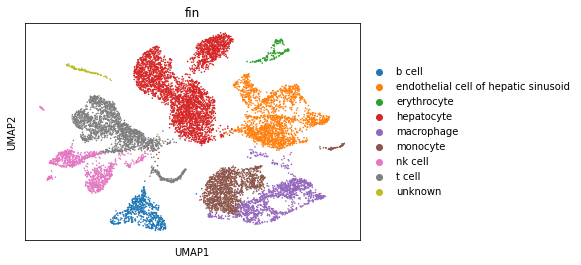

In [490]:
sc.pl.umap(liver, color = ['fin'])

In [491]:
# fin_liver_d = dict(zip(liver.obs.index, liver.obs.fin))

# with open('../data/annotations/human/liver_index_dictionary.pickle', 'wb') as handle:
#     pickle.dump(fin_liver_d, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Skin


In [395]:
skin = hdata[hdata.obs.tissue == 'skin']

In [396]:
skin.layers["counts"] = skin.X.copy()
sc.pp.normalize_total(skin, target_sum=1e4)
sc.pp.log1p(skin)
skin.raw = skin



sc.pp.highly_variable_genes(skin, flavor = 'seurat_v3', n_top_genes=6000,
                            layer = "counts", subset = True)

scvi.model.SCVI.setup_anndata(skin, layer = 'counts', categorical_covariate_keys=['donor'])
vae = scvi.model.SCVI(skin)
vae.train()


/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 196/196: 100%|██| 196/196 [09:47<00:00,  3.00s/it, loss=1.39e+03, v_num=1]
INFO     Training for 10 epochs.                                                             


/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 10/10: 100%|██████| 10/10 [01:05<00:00,  6.56s/it, loss=1.38e+03, v_num=1]


In [397]:
skin.obsm['X_scVI'] = vae.get_latent_representation()
skin.layers['scvi_normalized'] = vae.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(skin,  use_rep = 'X_scVI')
sc.tl.leiden(skin, resolution=0.15)
sc.tl.umap(skin)

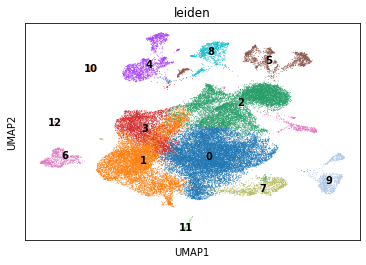

In [398]:
sc.pl.umap(skin, color = ['leiden'], legend_loc='on data')

In [434]:
skin.obs

,tissue,cell_type,age,sex,donor,sample,disease,tech,study,ref,_scvi_batch,_scvi_labels,predicted,probabilities,leiden,_scvi_raw_norm_scaling
AAACCTGAGCGATATA-1_S0,skin,not typed,18.0,F,Y18,HRS118996,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,1,46.082951
AAACCTGAGCGCTTAT-1_S0,skin,not typed,18.0,F,Y18,HRS118996,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,0,5.524862
AAACCTGAGTAGATGT-1_S0,skin,not typed,18.0,F,Y18,HRS118996,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,2,16.366611
AAACCTGCAAGGTTTC-1_S0,skin,not typed,18.0,F,Y18,HRS118996,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,0,2.763958
AAACCTGCACAGTCGC-1_S0,skin,not typed,18.0,F,Y18,HRS118996,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,0,1.368176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACATTAGC-1_S5,skin,not typed,48.0,F,M48,HRS119001,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,2,24.271845
TTTGTCACATTAGGCT-1_S5,skin,not typed,48.0,F,M48,HRS119001,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,1,1.556905
TTTGTCAGTAATCACC-1_S5,skin,not typed,48.0,F,M48,HRS119001,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,1,1.378550
TTTGTCATCAGCTGGC-1_S5,skin,not typed,48.0,F,M48,HRS119001,healthy,10x,skin,10.1016/j.devcel.2020.11.002,0,0,not typed,1.0,0,2.407318


In [399]:
df = vae.differential_expression(groupby = 'leiden')

DE...: 100%|████████████████████████████████████| 13/13 [00:43<00:00,  3.32s/it]


In [401]:
df = df[(df.lfc_mean > 0) & (df['is_de_fdr_0.05'] == True)][['proba_not_de', 'lfc_mean', 'is_de_fdr_0.05', 'group1']]

In [460]:
df[df.index == 'CD34']

,proba_not_de,lfc_mean,is_de_fdr_0.05,group1
CD34,0.0470,0.965437,True,2
CD34,0.0236,4.761394,True,4
CD34,0.0418,2.414083,True,5
CD34,0.0414,2.424703,True,8
CD34,0.0120,6.270967,True,9
CD34,0.0700,0.482938,True,11
CD34,0.0564,1.559171,True,12


In [468]:
df[df.group1 == '7'].sort_values('lfc_mean', ascending = False)[0:15]

,proba_not_de,lfc_mean,is_de_fdr_0.05,group1
SBSPON,0.0068,5.834542,True,7
GRP,0.0150,5.519340,True,7
TTYH1,0.0090,5.425328,True,7
SRRM4,0.0162,5.407525,True,7
BMP10,0.0158,5.369133,True,7
DPP10,0.0170,5.301741,True,7
FRZB,0.0200,5.299413,True,7
KRT19,0.0178,5.282685,True,7
ABCC12,0.0130,5.269464,True,7
FXYD6,0.0088,5.228968,True,7


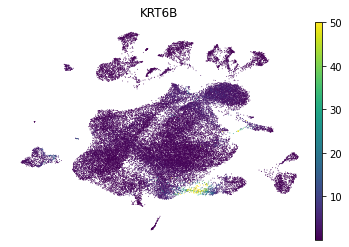

In [454]:
sc.pl.umap(skin, color = ['KRT6B'], frameon = False, layer = 'scvi_normalized', vmax = 50)

In [469]:
skin_d = {
    '0':'spinous cell',
    '1':'basal cell',
    '2':'granular cell',
    '3':'mitotic cell',
    '4':'fibroblast',
    '5':'immune cell',
    '6':'hair follicle',
    '7':'hair follicle',
    '8':'melanocyte',
    '9':'endothelial cell',
    '10':'smooth muscle',
    '11':'orbicularis oculi muscle',
    '12':'erythroid-like'
}

In [472]:
skin.obs['fin'] = skin.obs.leiden.map(skin_d)

In [478]:
# fin_skin_d = dict(zip(skin.obs.index, skin.obs.fin))

# with open('../data/annotations/human/skin_index_dictionary.pickle', 'wb') as handle:
#     pickle.dump(fin_skin_d, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Lung

In [81]:
lung = predict_annotations(hdata[hdata.obs.tissue == 'lung'], 
                    sc.read_h5ad('/home/ubuntu/s3_mount/Data/tabula_sapiens/TS_Lung.h5ad'))

/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 69/69: 100%|███████████| 69/69 [09:18<00:00,  8.09s/it, loss=422, v_num=1]
INFO     Training for 10 epochs.                                                             


/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 10/10: 100%|███████████| 10/10 [02:56<00:00, 17.64s/it, loss=549, v_num=1]


In [495]:
lung.layers["counts"] = lung.X.copy()
sc.pp.normalize_total(lung, target_sum=1e4)
sc.pp.log1p(lung)
lung.raw = lung



sc.pp.highly_variable_genes(lung, flavor = 'seurat_v3', n_top_genes=6000,
                            layer = "counts", subset = True)

scvi.model.SCVI.setup_anndata(lung, layer = 'counts', categorical_covariate_keys=['donor', 'disease'])
vae = scvi.model.SCVI(lung)
vae.train()


lung.obsm['X_scVI'] = vae.get_latent_representation()
lung.layers['scvi_normalized'] = vae.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(lung,  use_rep = 'X_scVI')
sc.tl.leiden(lung, resolution=0.15)
sc.tl.umap(lung)

/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 99/99: 100%|██████| 99/99 [09:56<00:00,  6.03s/it, loss=1.33e+03, v_num=1]


In [499]:
sc.tl.leiden(lung, resolution=0.25)

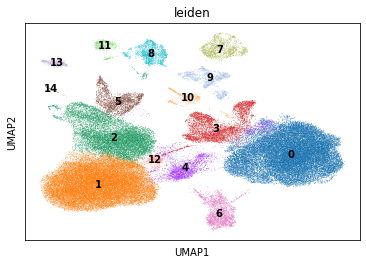

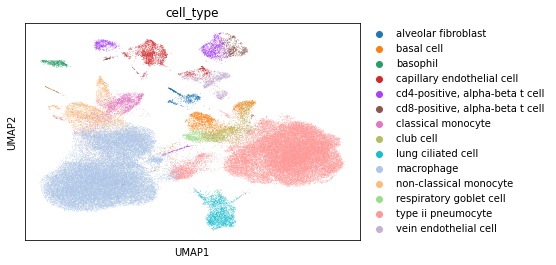

In [501]:
sc.pl.umap(lung, color = ['leiden'], legend_loc='on data')
sc.pl.umap(lung, color = ['cell_type'])

In [517]:
# fin_lung_d = dict(zip(lung.obs.index, lung.obs.cell_type))

# with open('../data/annotations/human/lung_index_dictionary.pickle', 'wb') as handle:
#     pickle.dump(fin_lung_d, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Hippo

In [85]:
hippo = sc.read_h5ad('/home/ubuntu/s3_mount/Data/human_hippo/human_hippo_sparse.h5ad')

In [86]:
hippo

AnnData object with n_obs × n_vars = 241631 × 23505
    obs: 'Age', 'Sex', 'batch', 'Disease', 'Sample'

In [87]:
sc.pp.filter_cells(hippo, min_genes=200) #get rid of cells with fewer than 200 genes
sc.pp.filter_genes(hippo, min_cells=3) #get rid of genes that are found in fewer than 3 cells

In [88]:
hippo

AnnData object with n_obs × n_vars = 213960 × 23505
    obs: 'Age', 'Sex', 'batch', 'Disease', 'Sample', 'n_genes'
    var: 'n_cells'

In [89]:
hippo.layers["counts"] = hippo.X.copy()
sc.pp.normalize_total(hippo, target_sum=1e4)
sc.pp.log1p(hippo)
hippo.raw = hippo



sc.pp.highly_variable_genes(hippo, flavor = 'seurat_v3', n_top_genes=6000,
                            layer = "counts", subset = True)

scvi.model.SCVI.setup_anndata(hippo, layer = 'counts', categorical_covariate_keys=['batch', 'Sample'],
                             continuous_covariate_keys = ['Age'])
vae = scvi.model.SCVI(hippo)
vae.train()

/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 37/37: 100%|███████████| 37/37 [10:18<00:00, 16.70s/it, loss=849, v_num=1]


In [90]:
hippo.obsm['X_scVI'] = vae.get_latent_representation()
hippo.layers['scvi_normalized'] = vae.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(hippo,  use_rep = 'X_scVI')
sc.tl.leiden(hippo, resolution=0.25)
sc.tl.umap(hippo)

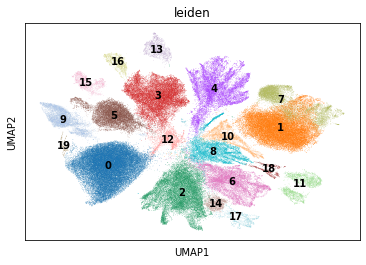

In [543]:
#sc.pl.umap(hippo, color = ['leiden'], legend_loc='on data') #old

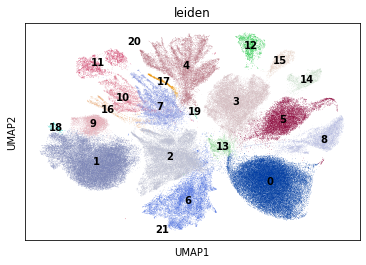

In [91]:
sc.pl.umap(hippo, color = ['leiden'], legend_loc='on data')

In [135]:
hippo_d = {
    '0':'oligodendrocyte', #
    '1':'dentate granule cell', #
    '2':'excitatory neuron', #
    '3':'astrocyte', #
    '4':'GABA interneuron', #
    '5':'oligodendrocyte precursor cell', #
    '6':'excitatory neuron', #
    '7':'excitatory neuron', #
    '8':'microglia', #
    '9':'dentate granule cell', #
    '10':'excitatory neuron', #
    '11':'excitatory neuron', #
    '12':'choroid plexus cells', #
    '13':'excitatory neuron', #
    '14':'endothelial cells',
    '15':'ependymal cell', #
    '16':'excitatory neuron', #
    '17':'GABA interneuron', #
    '18':'dentate granule cell', #
    '19':'cajal-retzius cell', #
    '20':'GABA interneuron',#
    '21':'excitatory neuron'
}

In [132]:
# df = vae.differential_expression(groupby = 'leiden')

# df = df[(df.lfc_mean > 0) & (df['is_de_fdr_0.05'] == True)][['proba_not_de', 'lfc_mean', 'is_de_fdr_0.05', 'group1']]


# df[df.index == 'GAD2']

# df[df.index == 'CLIC6']



# df[df.group1 == '19'].sort_values('lfc_mean', ascending = False)[0:15]

# #sc.pl.umap(hippo, color = ['SLC17A7'], frameon = False, layer = 'scvi_normalized', vmax = 5)
# #sc.pl.umap(hippo, color = ['EPHA5'], frameon = False, layer = 'scvi_normalized', vmax = 10)
# sc.pl.umap(hippo, color = ['RELN'], frameon = False, layer = 'scvi_normalized', vmax = 50)
# sc.pl.umap(hippo, color = ['leiden'], legend_loc='on data')

In [136]:
hippo.obs['fin'] = hippo.obs.leiden.map(hippo_d)

In [137]:
fin_hippo_d = dict(zip(hippo.obs.index, hippo.obs.fin))

with open('../data/annotations/human/hippo_index_dictionary.pickle', 'wb') as handle:
    pickle.dump(fin_hippo_d, handle, protocol=pickle.HIGHEST_PROTOCOL)

# HCL

In [12]:
refdata = sc.read_h5ad('/home/ubuntu/s3_mount/Data/tabula_sapiens/TabulaSapiens.h5ad')
adata = hdata[hdata.obs.study == 'hcl']
refdata = refdata.raw.to_adata()
refdata.obs['Batch'] = 'ref'
adata.obs = adata.obs.rename(columns = {'cell_type':'cell_ontology_class', 'tech':'method'})
adata.obs.method = adata.obs.method.replace('10x','10X')
adata.obs['Batch'] = 'query'
adata = sc.concat((adata, refdata))
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata



In [16]:
adata

AnnData object with n_obs × n_vars = 754596 × 21751
    obs: 'cell_ontology_class', 'donor', 'method', 'Batch'
    uns: 'log1p'
    layers: 'counts'

In [17]:
sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
sc.pp.filter_genes(adata, min_cells=100) #get rid of genes that are found in fewer than 3 cells

In [20]:
adata

AnnData object with n_obs × n_vars = 750498 × 19637
    obs: 'cell_ontology_class', 'donor', 'method', 'Batch', 'n_genes'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [ ]:
# sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000,
#                             layer = "counts", subset = True)

scvi.model.SCVI.setup_anndata(adata, layer = 'counts', batch_key= 'Batch',
                              categorical_covariate_keys=['donor', 'method'])
vae = scvi.model.SCVI(adata)
vae.train()

lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = adata, unlabeled_category = 'not typed',
                                    labels_key = 'cell_ontology_class')

lvae.train()

adata.obs['predicted'] = lvae.predict(adata)

adata.obs['probabilities'] = lvae.predict(adata, soft = True).max(axis = 1)


/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 11/11: 100%|█████| 11/11 [21:06<00:00, 115.11s/it, loss=5.42e+03, v_num=1]
INFO     Training for 4 epochs.                                                              


/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

Epoch 2/4:  25%|██▎      | 1/4 [04:20<13:01, 260.49s/it, loss=5.67e+03, v_num=1]

In [23]:
mapper = dict(zip(adata.obs.index, adata.obs.predicted))
mapper2 = dict(zip(adata.obs.index, adata.obs.probabilities))


,cell_ontology_class,donor,method,Batch,n_genes,_scvi_batch,_scvi_labels,predicted,probabilities
GCAGGACCAGACATCAAC_1,not typed,GSM3943046,dropseq,query,342,0,177,fibroblast,0.999857
CGAGTACGAGTAAAAGTT_1,not typed,GSM3943046,dropseq,query,389,0,177,macrophage,0.999994
AACCTAGACACTAACCTA_1,not typed,GSM3943046,dropseq,query,346,0,177,fibroblast,0.999985
GCAGGAGCGAATTAGTCG_1,not typed,GSM3943046,dropseq,query,495,0,177,macrophage,0.986888
TGATCAGTATACACGTTG_1,not typed,GSM3943046,dropseq,query,320,0,177,fibroblast,0.999704
...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,endothelial cell,TSP2,smartseq2,ref,516,1,47,endothelial cell,1.000000
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,endothelial cell,TSP2,smartseq2,ref,473,1,47,endothelial cell,1.000000
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,endothelial cell,TSP2,smartseq2,ref,2426,1,47,endothelial cell,1.000000
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,endothelial cell,TSP2,smartseq2,ref,873,1,47,endothelial cell,1.000000


In [25]:
adata = hdata[hdata.obs.study == 'hcl']

In [26]:
adata.obs['predicted'] = adata.obs.index.map(mapper)
adata.obs['probabilities'] = adata.obs.index.map(mapper2)

/tmp/ipykernel_1384/1582973212.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['predicted'] = adata.obs.index.map(mapper)


In [27]:
adata.obs

,tissue,cell_type,age,sex,donor,sample,disease,tech,study,ref,predicted,probabilities
GCAGGACCAGACATCAAC_1,Adipose,not typed,36.0,M,GSM3943046,SRR9693313,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,fibroblast,0.999857
CGAGTACGAGTAAAAGTT_1,Adipose,not typed,36.0,M,GSM3943046,SRR9693313,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,macrophage,0.999994
AACCTAGACACTAACCTA_1,Adipose,not typed,36.0,M,GSM3943046,SRR9693313,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,fibroblast,0.999985
GCAGGAGCGAATTAGTCG_1,Adipose,not typed,36.0,M,GSM3943046,SRR9693313,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,macrophage,0.986888
TGATCAGTATACACGTTG_1,Adipose,not typed,36.0,M,GSM3943046,SRR9693313,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,fibroblast,0.999704
...,...,...,...,...,...,...,...,...,...,...,...,...
ACGAGCCTCCATCCATCT_67,Kidney,not typed,66.0,M,Adult-Kidney2,SRR9887775,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,t cell,0.999738
AAGTACTTCATACCTTTC_67,Kidney,not typed,66.0,M,Adult-Kidney2,SRR9887775,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,epithelial cell,0.999980
GGGTTTATGGCGGCCCTC_67,Kidney,not typed,66.0,M,Adult-Kidney2,SRR9887775,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,epithelial cell,0.999888
CCTAGAGAACGCTCACTT_67,Kidney,not typed,66.0,M,Adult-Kidney2,SRR9887775,healthy,dropseq,hcl,10.1038/s41586-020-2157-4,epithelial cell,0.999855


In [34]:
temp = adata.obs.groupby(['tissue', 'predicted']).count() #reset_index()

In [37]:
temp = temp[temp.sum(axis = 1) > 0].reset_index()

In [39]:
#temp.to_csv('../data/annotations/human/hcl_label_transfer_counts.csv')

In [40]:
hcl_counts = pd.read_csv('../data/annotations/human/hcl_label_transfer_counts.csv')

In [41]:
hcl_counts

,Unnamed: 0,tissue,predicted,keep,cell_type,age,sex,donor,sample,disease,tech,study,ref,probabilities
0,0,Adipose,classical monocyte,n,1,1,1,1,1,1,1,1,1,1
1,1,Adipose,endothelial cell,n,1,1,1,1,1,1,1,1,1,1
2,2,Adipose,epithelial cell,n,1,1,1,1,1,1,1,1,1,1
3,3,Adipose,erythrocyte,n,1,1,1,1,1,1,1,1,1,1
4,4,Adipose,fibroblast,y,228,228,228,228,228,228,228,228,228,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,318,Uterus,fibroblast,y,803,803,803,803,803,803,803,803,803,803
319,319,Uterus,luminal epithelial cell of mammary gland,m,102,102,102,102,102,102,102,102,102,102
320,320,Uterus,macrophage,y,80,80,80,80,80,80,80,80,80,80
321,321,Uterus,mesenchymal stem cell,y,402,402,402,402,402,402,402,402,402,402


In [42]:
#n: ones that were very low in tissues or most of the blood cells from solid tissues
#y: ones that seemed like the labeling was more or less correct
#m: high number of cells but the labeling is off, most likely to need fix
hcl_counts = hcl_counts[hcl_counts.keep != 'n']

In [49]:
keepers = list(hcl_counts.tissue + '__'+ hcl_counts.predicted)

In [55]:
adata = adata[(adata.obs.tissue.astype('str') + '__'+ adata.obs.predicted).isin(keepers)]

In [57]:
m_or_y = dict(zip((hcl_counts.tissue.astype('str') + '__'+ hcl_counts.predicted), hcl_counts.keep))

def a_thing(x):
    y = m_or_y[x]
    if y == 'y':
        return x.split('__')[1]
    else:
        return 'm'

adata.obs['label_temp'] = (adata.obs.tissue.astype('str') + '__'+ adata.obs.predicted).map(a_thing)

/tmp/ipykernel_1384/996991544.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['label_temp'] = (adata.obs.tissue.astype('str') + '__'+ adata.obs.predicted).map(a_thing)


In [66]:
def pp2(adata):
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
    adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]
    adata = adata[adata.obs.pct_counts_mt < 20]
    sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI
    sc.pp.log1p(adata) #change to log counts
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
    adata.raw = adata #save raw data before processing values and further filtering
    adata = adata[:, adata.var.highly_variable] #filter highly variable
    sc.pp.scale(adata, max_value=10) #scale each gene to unit variance
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
    sc.tl.leiden(adata, resolution = 0.2)
    sc.tl.umap(adata)
    
    return adata

In [78]:
hcl_obs = {}
for tissue in tqdm(hcl_counts.tissue.unique()):
    temp = adata[adata.obs.tissue == tissue].copy()
    if 'm' in temp.obs.label_temp.values:
        hcl_obs[tissue] = pp2(temp)
        

  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
 16%|███████                                     | 4/25 [00:04<00:21,  1.02s/it]/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
 20%|████████▊                                   | 5/25 [00:18<01:29,  4.48s/it]/home/ubuntu/miniconda

Bladder


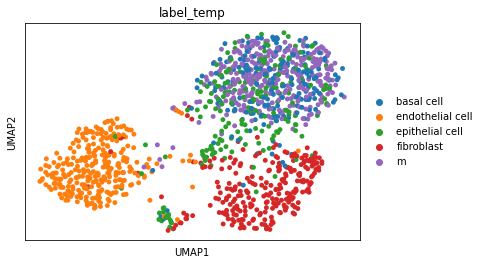

Bone-Marrow


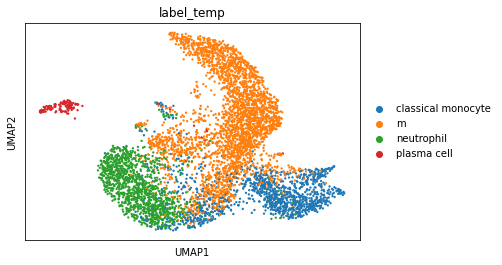

Brain


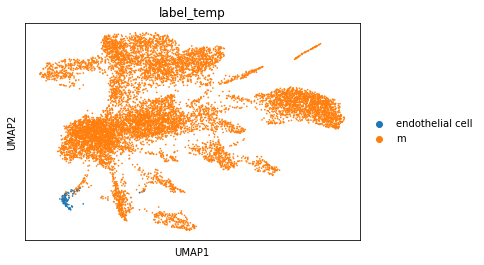

Cervix


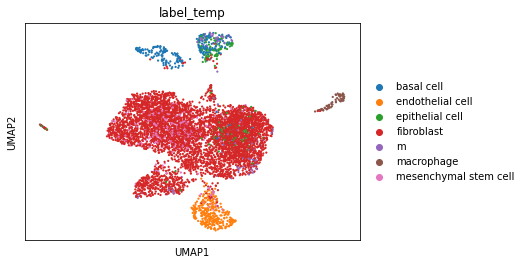

Esophagus


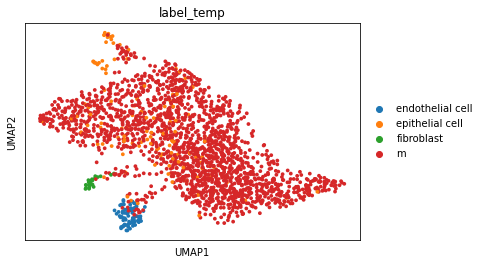

Fallopian-Tube


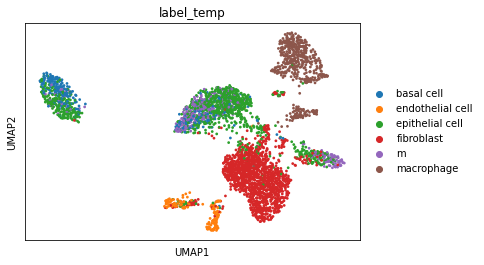

Gall-Bladder


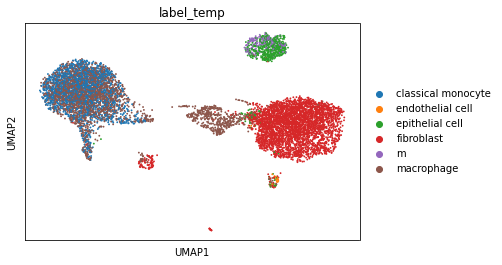

Intestine


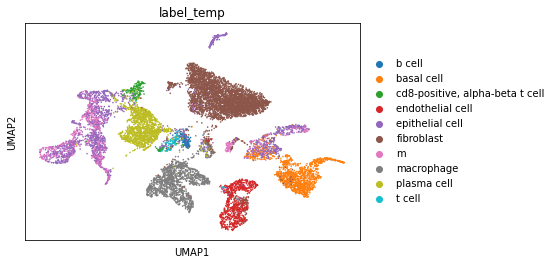

Kidney


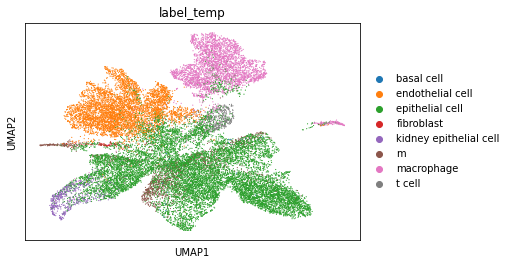

Lung


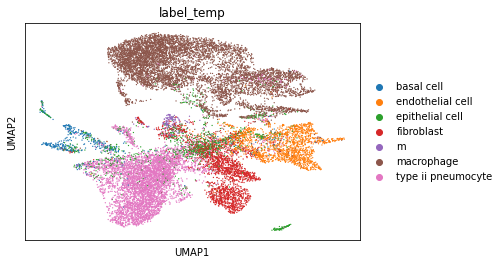

Muscle


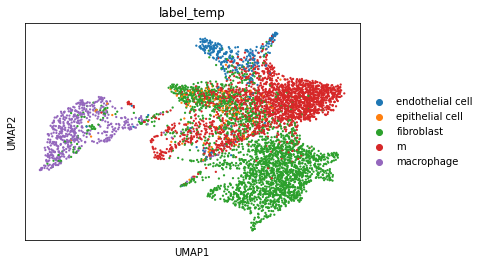

Prostate


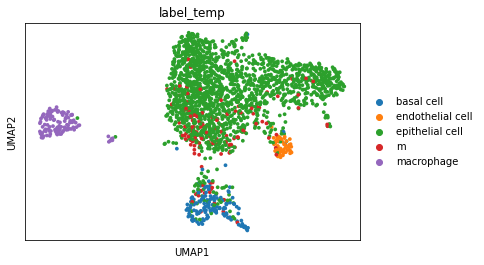

Spleen


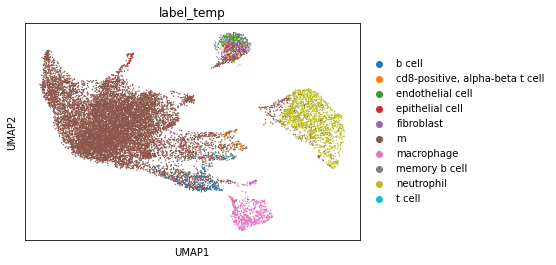

Stomach


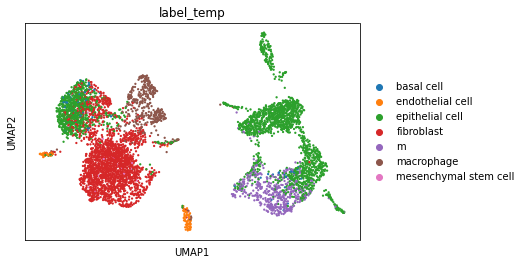

Thyroid


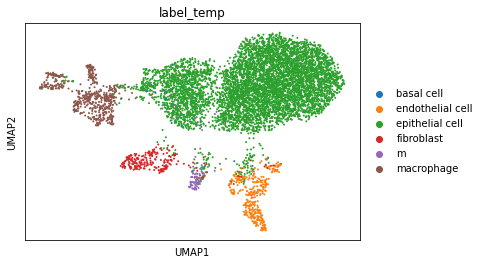

Trachea


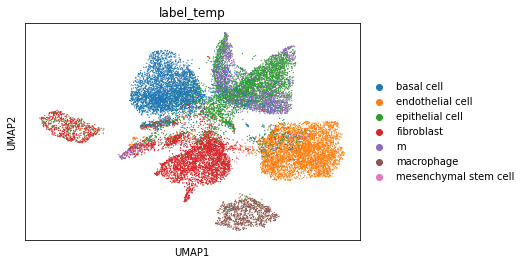

Uterus


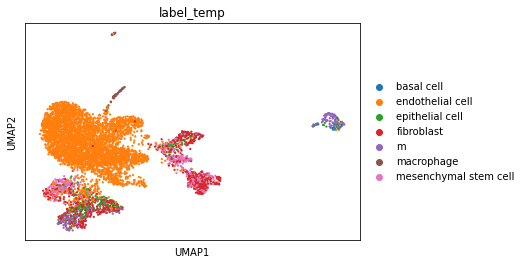

In [80]:
for tissue in list(hcl_obs):
    print(tissue)
    sc.pl.umap(hcl_obs[tissue], color = 'label_temp')

In [84]:
fin_hcl_d = dict(zip(adata.obs.index, adata.obs.label_temp))

with open('../data/annotations/human/hcl_index_dictionary.pickle', 'wb') as handle:
    pickle.dump(fin_hcl_d, handle, protocol=pickle.HIGHEST_PROTOCOL)